In [1]:
library(ggplot2)
library(data.table)
library(dplyr)
library(tidyr)
library(purrr) 
library(patchwork)
library(cowplot)
library(ggbreak)
library(scales)
if (!require(extrafont)) install.packages("extrafont")
library(extrafont)

# 3. 폰트 로드
loadfonts()


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



다음의 패키지를 부착합니다: ‘purrr’


The following object is masked from ‘package:data.table’:

    transpose



다음의 패키지를 부착합니다: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots




ERROR: Error in library(ggbreak): ‘ggbreak’이라고 불리는 패키지가 없습니다


# Step 1. Load data

In [6]:
df <- fread(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/data/simulation/obj2/simulation.l2.tsv",
    sep = "\t"
)

head(df)

A_true,X_true,eta,alp,X_ridge,X_noRidge
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1,0.005,0.341828,-2,0.02481899,0.02501505
0.1,0.005,0.341828,-1,0.02445001,0.02501505
0.1,0.005,0.341828,0,0.02343095,0.02501505
0.1,0.005,0.341828,1,0.02088449,0.02501505
0.1,0.005,0.341828,2,0.01584637,0.02501505
0.1,0.005,0.341828,3,0.00929009,0.02501505


# plot theme

In [7]:
# 공통 테마 함수 정의
get_nature_theme <- function() {
    theme_bw() +
        theme(
            # 전체적인 배경
            panel.background = element_rect(fill = NA, color = NA),
            panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            panel.border = element_blank(),  
            
            # 축 설정
            axis.line.x.top = element_blank(),
            axis.line.y.right = element_blank(),
            axis.line.x.bottom = element_line(color = "black", size = 0.3),  
            axis.line.y.left = element_line(color = "black", size = 0.3),    
            axis.text = element_text(size = 6.5, color = "black"),
            axis.title = element_text(size = 7.5, color = "black"),
            axis.ticks = element_line(size = 0.3),
            axis.ticks.length = unit(0.8, "mm"),
            
            # 범례 설정
            legend.margin = margin(1, 1, 1, 1, unit = "mm"),
            # legend.spacing.y = unit(0.1, "cm"),
            
            # 여백 설정
            # plot.margin = unit(c(0.1, 0.2, 0.1, 0.1), "cm")
            plot.margin = margin(0, 0, 0, 0)
        )
}

# Step 2. Plot

In [8]:
df_melt <- df %>%
  pivot_longer(
    cols = c("X_ridge", "X_noRidge"), # value_vars에 해당
    names_to = "method",              # var_name에 해당
    values_to = "X"                   # value_name에 해당
  )

df_melt$alp <- as.factor(df_melt$alp)
head(df_melt)


A_true,X_true,eta,alp,method,X
<dbl>,<dbl>,<dbl>,<fct>,<chr>,<dbl>
0.1,0.005,0.341828,-2,X_ridge,0.02481899
0.1,0.005,0.341828,-2,X_noRidge,0.02501505
0.1,0.005,0.341828,-1,X_ridge,0.02445001
0.1,0.005,0.341828,-1,X_noRidge,0.02501505
0.1,0.005,0.341828,0,X_ridge,0.02343095
0.1,0.005,0.341828,0,X_noRidge,0.02501505


Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


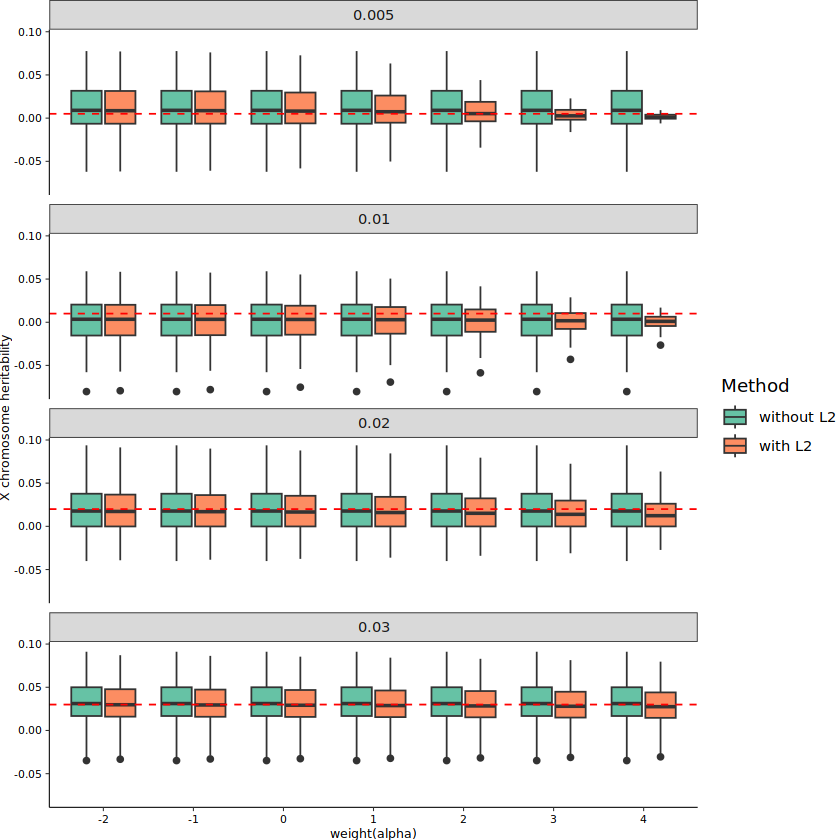

In [9]:
p <- ggplot(df_melt, aes(x = alp, y = X, fill = method)) +
  geom_boxplot() +
  geom_hline(aes(yintercept = X_true), linetype = "dashed", color = "red") +  # true line 추가
  facet_wrap(~X_true, ncol = 1) +  # X_true 값별로 row 생성
  scale_fill_brewer(palette = "Set2", 
                   labels = c("without L2", "with L2")) +  # 범례 라벨 변경
  
  get_nature_theme() +
  labs(
    x = "weight(alpha)",
    y = "X chromosome heritability",
    fill = "Method"
  )

p

In [10]:

output_path <- paste0(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/figures/simulation.X-varying-alpha.pdf"
)

ggsave(
    filename = output_path,
    plot = p,
    width = 138,
    height = 120,
    units = "mm",
    dpi = 300,
    device = cairo_pdf
)
